In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.xmargin'] = 0

# Chapter 6 exercise

By applying the central formulae {eq}`central2` and {eq}`central1a` to replace the first and second derivatives we obtain

```{math}
:label: example_upd
x_{k+1} = \frac{x_k(2-10h^2)+x_{k-1}(-1+h)}{1+h}
```

Again, we require two starting points. It is tempting to use the explicit Euler method with the first derivative condition to estimate $x_1$. However, that method is only first order accurate, so this will contaminate our second order accurate algorithm and produce a result that is only $\mathcal{O}(h)$ accurate. 

We therefore use the $\mathcal{O}(h^2)$ central differences formula for the boundary condition, which gives:

```{math}
:label: cdiffbcond1
\frac{x_1-x_{-1}}{2h} = x^{\prime}_0 \quad \Rightarrow \quad x_{-1}= x_1+2h.
```

This relationship involves the solution at the "ghost" point $x_{-1}$ where $t=-h$. We do not know the result at this point, but we can solve the problems for $x_{-1},x_0,x_1$ simultaneously to obtain our starting points.

From {eq}`example_upd` we obtain

\begin{equation*}
(1+h)x_1 = (2-10h^2)x_0 +(-1+h)x_{-1}
\end{equation*}

Substituting for $x_{-1}$ from {eq}`cdiffbcond1` and using the boundary condition $x_0=1$ then gives 

\begin{align*}
(1+h)x_1&=(2-10h^2)+(-1+h)(x_1+2h) \\ &\implies x_{-1}=1-h-4h^2.
\end{align*}

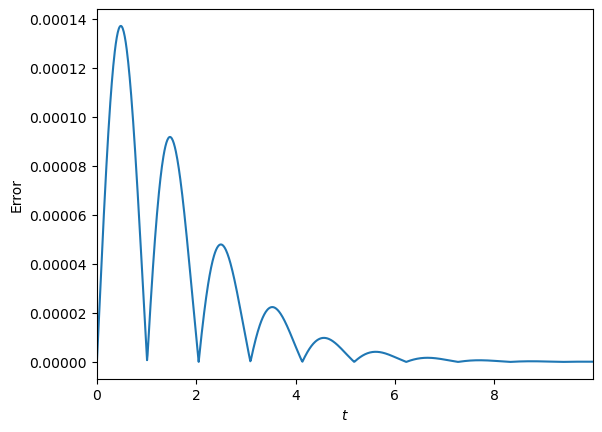

In [2]:
from numpy import arange,cos,exp
import matplotlib.pyplot as plt
plt.rcParams['axes.xmargin'] = 0
h=0.01
t=np.arange(0,10,h)
xsol=exp(-t)*cos(3*t)

n=len(t); x=np.empty(n)   # Pre-allocate
x[0]=1;                   # Initial value
x[1]=1-h-4*h**2           # Ghost point

# Central difference rule
for k in range(1,n-1):
  x[k+1]=((2-10*h**2)*x[k]+(-1+h)*x[k-1])/(1+h)

# Compare to analytic solution
plt.plot(t,abs(x-xsol))
plt.xlabel('$t$'); plt.ylabel('Error')
plt.show()